In [1]:
!pip install nltk

In [3]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

cleaned text is: food brings people together offering comfort culture and nourishment from spicy street eats to gourmet dishes it delights our senses and fuels our bodies creating unforgettable memories with every bite

word tokens are: ['food', 'brings', 'people', 'together', 'offering', 'comfort', 'culture', 'and', 'nourishment', 'from', 'spicy', 'street', 'eats', 'to', 'gourmet', 'dishes', 'it', 'delights', 'our', 'senses', 'and', 'fuels', 'our', 'bodies', 'creating', 'unforgettable', 'memories', 'with', 'every', 'bite']

sentence tokens are: ['Food brings people together, offering comfort, culture, and nourishment.', 'From spicy street eats to gourmet dishes, it delights our senses and fuels our bodies, creating unforgettable memories with every bite.']

after removing stopwords: ['food', 'brings', 'people', 'together', 'offering', 'comfort', 'culture', 'nourishment', 'spicy', 'street', 'eats', 'gourmet', 'dishes', 'delights', 'senses', 'fuels', 'bodies', 'creating', 'unforgettable

<Axes: title={'center': 'top words'}, xlabel='Samples', ylabel='Counts'>

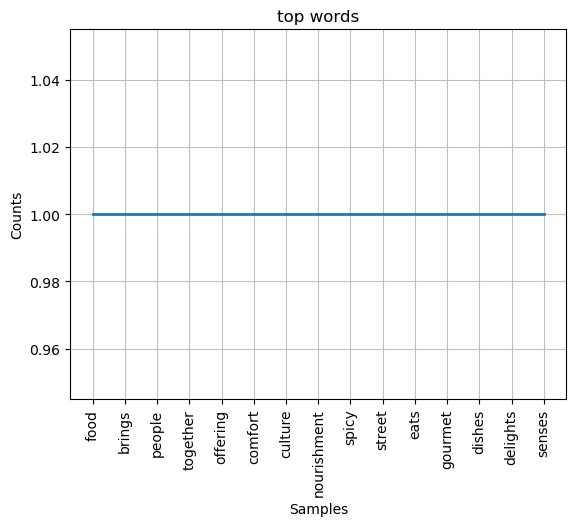

In [14]:
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
text="Food brings people together, offering comfort, culture, and nourishment. From spicy street eats to gourmet dishes, it delights our senses and fuels our bodies, creating unforgettable memories with every bite."
text_lower=text.lower()
text_clean=text_lower.translate(str.maketrans('','',string.punctuation))
print(f"cleaned text is: {text_clean}")
print()

word_tokens=word_tokenize(text_clean)
sent_tokens=sent_tokenize(text)
print(f"word tokens are: {word_tokens}")
print()
print(f"sentence tokens are: {sent_tokens}")
print()

stop_words=set(stopwords.words('english'))
filtered_words=[w for w in word_tokens if w not in stop_words]
print(f"after removing stopwords: {filtered_words}")
print()

fd=FreqDist(filtered_words)
fd.plot(15,title="top words")

In [16]:
from nltk.stem import PorterStemmer,LancasterStemmer,WordNetLemmatizer
ps=PorterStemmer()
ls=LancasterStemmer()
wn=WordNetLemmatizer()
porter=[]
lan=[]
w=[]
for word in filtered_words:
    porter.append(ps.stem(word))
for word in filtered_words:
    lan.append(ls.stem(word))
for word in filtered_words:
    w.append(wn.lemmatize(word))
print(f"using porter stemmer: {porter}")
print()
print(f"using lancaster stemmer: {lan}")
print()
print(f"using word net lemmatizer: {w}")

using porter stemmer: ['food', 'bring', 'peopl', 'togeth', 'offer', 'comfort', 'cultur', 'nourish', 'spici', 'street', 'eat', 'gourmet', 'dish', 'delight', 'sens', 'fuel', 'bodi', 'creat', 'unforgett', 'memori', 'everi', 'bite']

using lancaster stemmer: ['food', 'bring', 'peopl', 'togeth', 'off', 'comfort', 'cult', 'nour', 'spicy', 'street', 'eat', 'gourmet', 'dish', 'delight', 'sens', 'fuel', 'body', 'cre', 'unforget', 'mem', 'every', 'bit']

using word net lemmatizer: ['food', 'brings', 'people', 'together', 'offering', 'comfort', 'culture', 'nourishment', 'spicy', 'street', 'eats', 'gourmet', 'dish', 'delight', 'sens', 'fuel', 'body', 'creating', 'unforgettable', 'memory', 'every', 'bite']


In [25]:
import re
a=re.findall(r'\b\w{6,}\b',text)
print(f"words with length more than 5 are: {a}")
print()
b=re.findall(r'\d+',text)
print(f"numbers are: {b}")
print()
c=re.findall(r'\b[A-Z]\w*\b',text)
print(f"capitalized words are: {c}")
print()
d=re.findall(r'\b[A-Za-z]+\b',text)
print(f"words containing only alphabets are: {d}")
print()
e=re.findall(r'\b[aeiouAEIOU]\w*\b',text)
print(f"words starting with vowels are: {e}")

words with length more than 5 are: ['brings', 'people', 'together', 'offering', 'comfort', 'culture', 'nourishment', 'street', 'gourmet', 'dishes', 'delights', 'senses', 'bodies', 'creating', 'unforgettable', 'memories']

numbers are: []

capitalized words are: ['Food', 'From']

words containing only alphabets are: ['Food', 'brings', 'people', 'together', 'offering', 'comfort', 'culture', 'and', 'nourishment', 'From', 'spicy', 'street', 'eats', 'to', 'gourmet', 'dishes', 'it', 'delights', 'our', 'senses', 'and', 'fuels', 'our', 'bodies', 'creating', 'unforgettable', 'memories', 'with', 'every', 'bite']

words starting with vowels are: ['offering', 'and', 'eats', 'it', 'our', 'and', 'our', 'unforgettable', 'every']


In [27]:
def custom_tokenizer(text):
  pattern = r"\b\w+(?:-\w+)+\b|\b\w+'[a-z]+\b|\b\d+\.\d+\b|\b\d+\b|\b[a-zA-Z]+\b"
  tokens=re.findall(pattern,text)
  return tokens

print(custom_tokenizer(text))
print(custom_tokenizer("State-of-the-art AI isn't easy to build. 3.14 is Pi."))
print()
sample = "My email is aryan@email.com,  my website is https://www.blahblah.com you can call me at 123-456-7890 or +91 1234567890."

sample=re.sub(r'\S+@\S+','',sample)
sample = re.sub(r'(?:\+91[\s\-]?)?\d{10}|\d{3}-\d{3}-\d{4}', '', sample)

sample=re.sub(r'https?://[^\s]+', '', sample)

print(sample)

['Food', 'brings', 'people', 'together', 'offering', 'comfort', 'culture', 'and', 'nourishment', 'From', 'spicy', 'street', 'eats', 'to', 'gourmet', 'dishes', 'it', 'delights', 'our', 'senses', 'and', 'fuels', 'our', 'bodies', 'creating', 'unforgettable', 'memories', 'with', 'every', 'bite']
['State-of-the-art', 'AI', "isn't", 'easy', 'to', 'build', '3.14', 'is', 'Pi']

My email is   my website is  you can call me at  or .
